In [ ]:
import warnings, os, math
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.base import clone
from scipy.stats import pearsonr
from sklearn.feature_selection import f_classif

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dry_Bean_Dataset.xlsx')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


1. Below displayed the statistical measures for the attributes along with histogram plots
2. Most of the attributes show no clear evidence of skewness or any irregularities in the data. There aren't any null values in the dataset as well.
3. Since target lablels are texts, I've label encoded them to numerical values
4. I've split the dataset into Train - 60%, Val - 20% and Test - 20%

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [ ]:
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


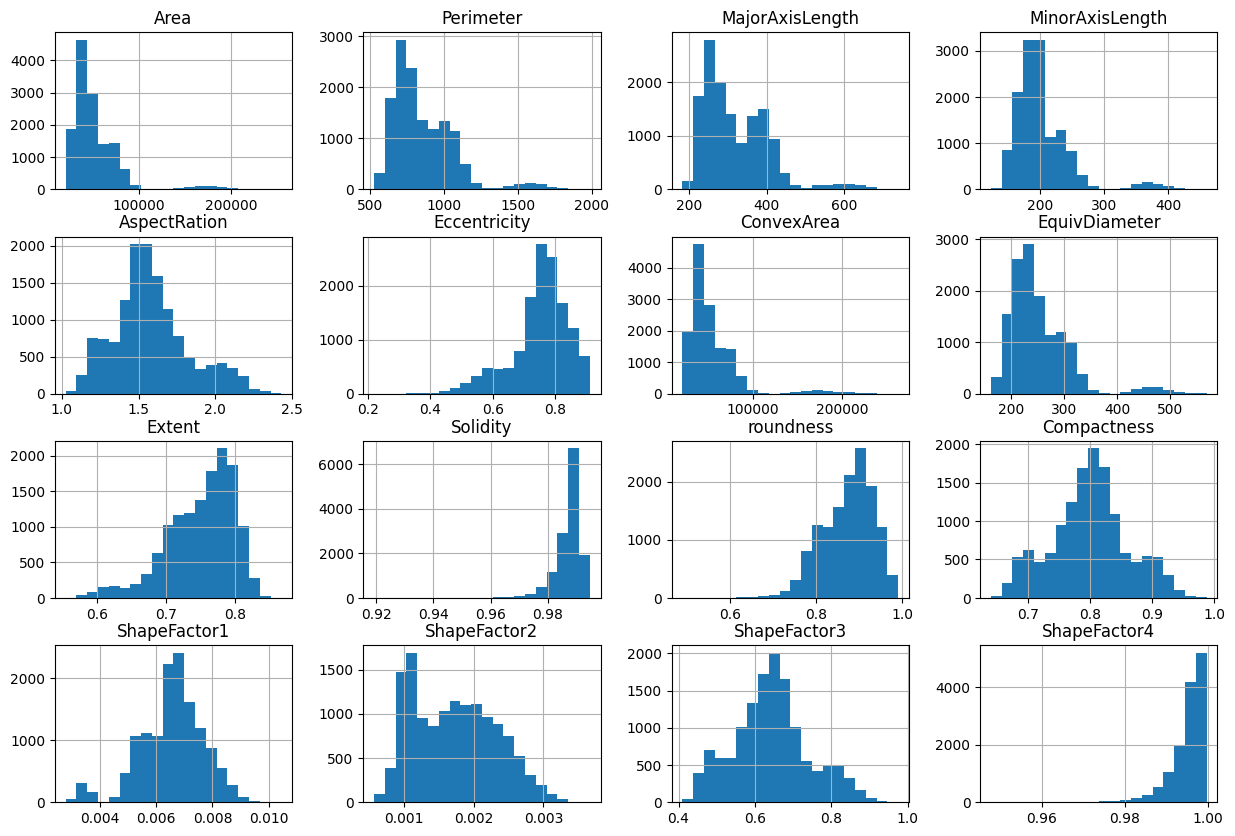

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

# First split into train and temp (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Then split the temp set equally into validation and test (20% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (8166, 16) (8166,)
Validation shape: (2722, 16) (2722,)
Test shape: (2723, 16) (2723,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)  # fit only on training labels

y_train_enc = encoder.transform(y_train)
y_val_enc   = encoder.transform(y_val)
y_test_enc  = encoder.transform(y_test)

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'BARBUNYA': np.int64(0), 'BOMBAY': np.int64(1), 'CALI': np.int64(2), 'DERMASON': np.int64(3), 'HOROZ': np.int64(4), 'SEKER': np.int64(5), 'SIRA': np.int64(6)}


1. Below I've plotted Pearson correlation matrix for between features and we can see set of features are highly correlated between them and negatively correlated with other set of features, which shows clear identifying character for their classes.
2. For feature and label relationship, I've performed ANOVA F-test, which gave higher value F score for many features which also shows the strong character for identifying their classes. Also, I've made scatter plot between features and label.
3. Also feature importance plot shows the top features to contribute in identifying their classes such as area, perimeter, e.t.c

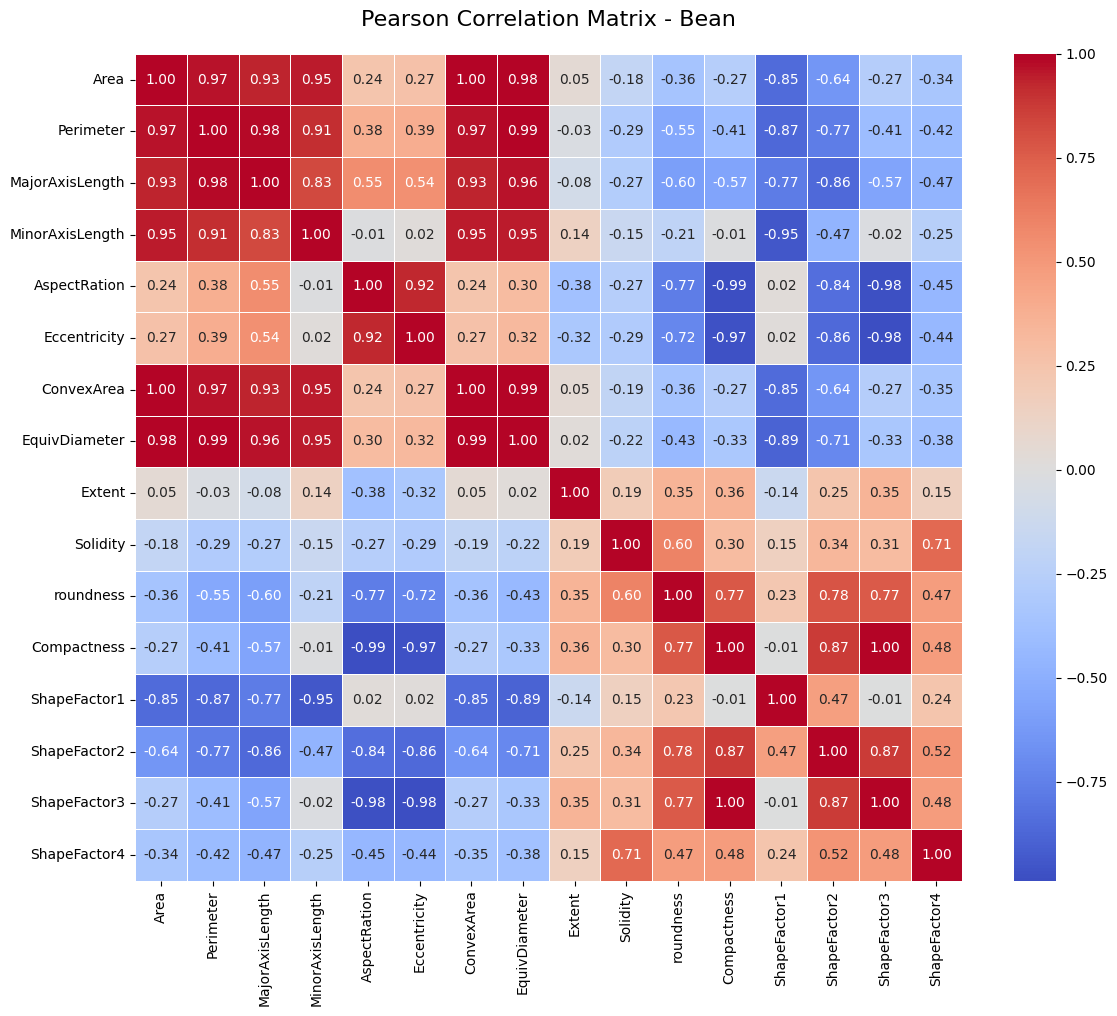


=== Feature-Label Association (ANOVA F-test) ===
        Feature      ANOVA_F       P-value Significant
           Area 17424.052789  0.000000e+00         Yes
     ConvexArea 17410.777242  0.000000e+00         Yes
  EquivDiameter 15249.724302  0.000000e+00         Yes
      Perimeter 14574.966168  0.000000e+00         Yes
MinorAxisLength 13586.240813  0.000000e+00         Yes
MajorAxisLength 12818.090548  0.000000e+00         Yes
   ShapeFactor2  7334.429682  0.000000e+00         Yes
   ShapeFactor1  7334.355632  0.000000e+00         Yes
   AspectRation  6128.955990  0.000000e+00         Yes
    Compactness  6047.120987  0.000000e+00         Yes
   ShapeFactor3  5899.078861  0.000000e+00         Yes
   Eccentricity  4943.107638  0.000000e+00         Yes
      roundness  3680.645144  0.000000e+00         Yes
   ShapeFactor4   715.246897  0.000000e+00         Yes
       Solidity   380.002566  0.000000e+00         Yes
         Extent   262.153231 1.013212e-307         Yes


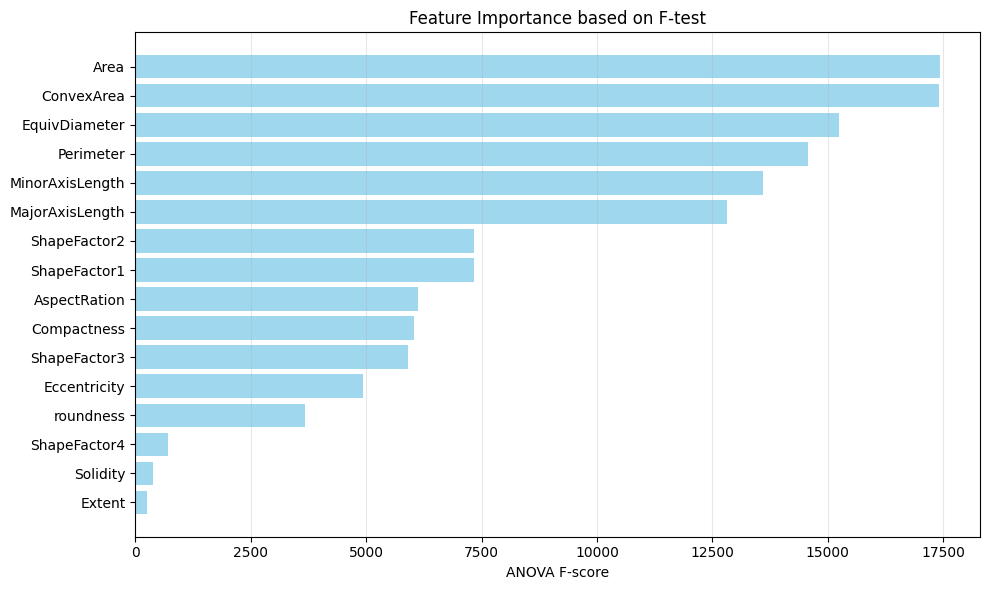

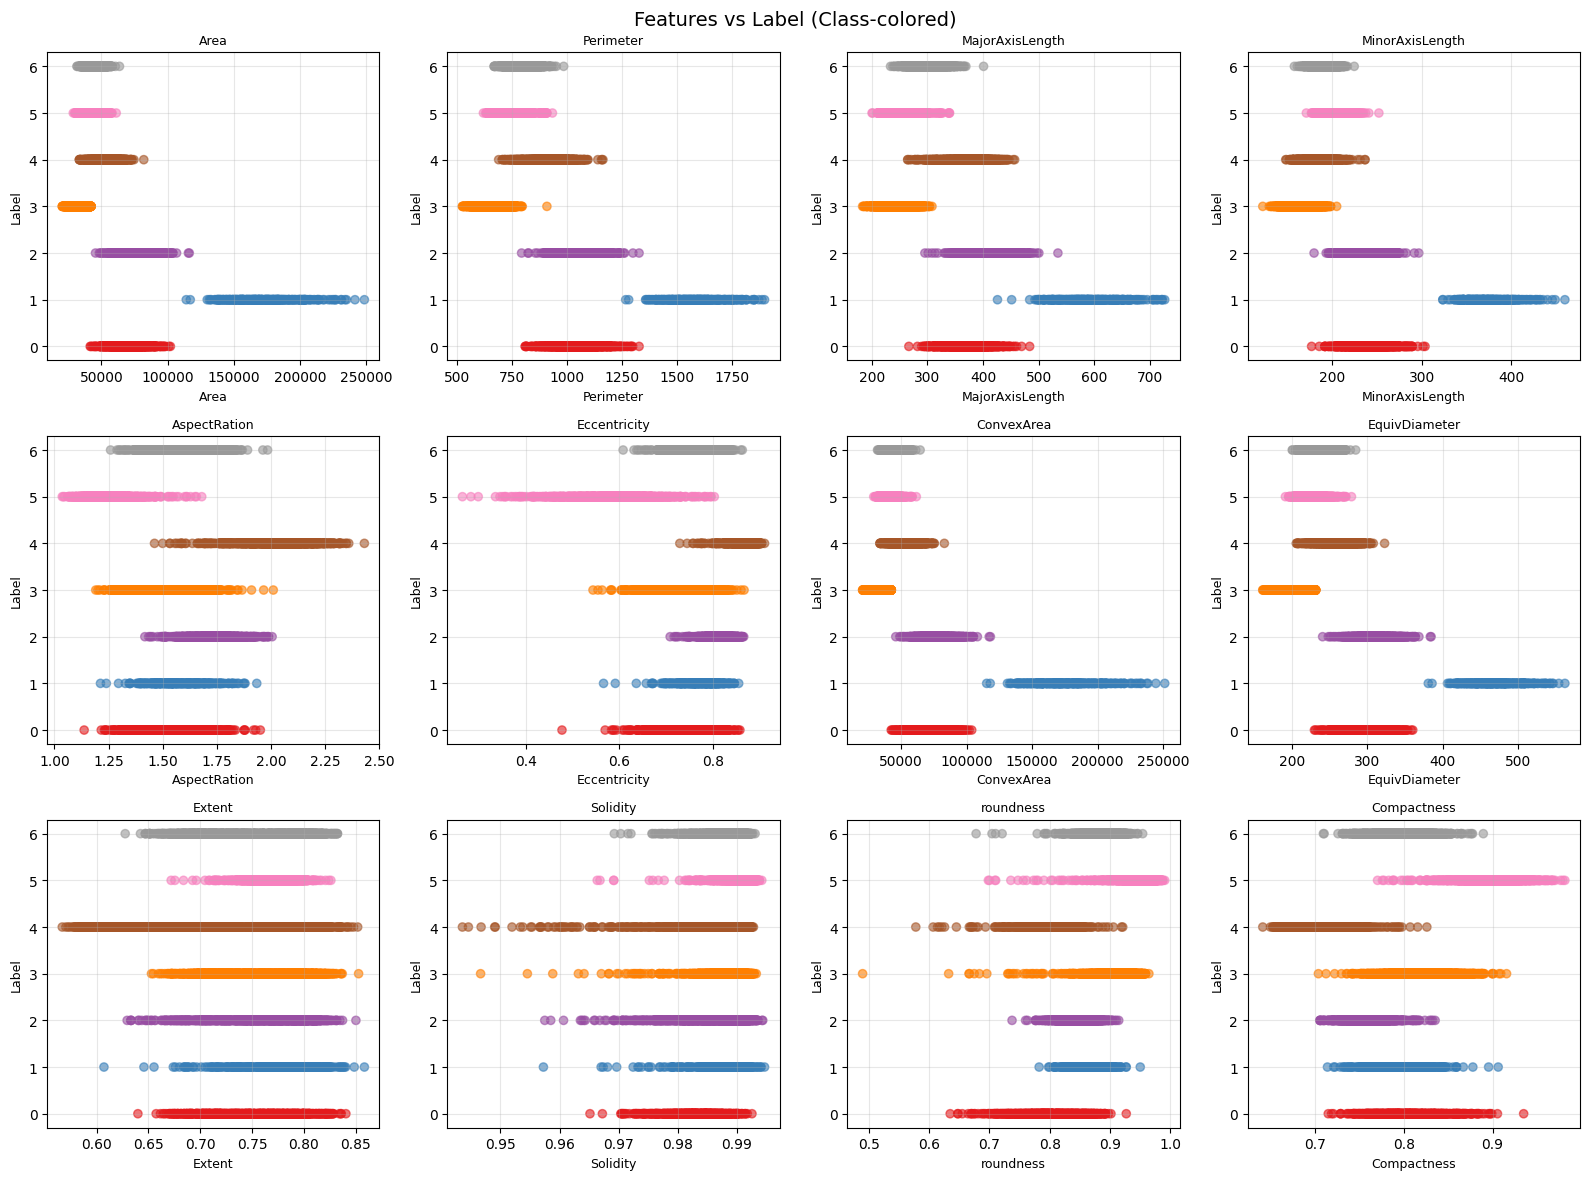


✓ Analysis complete! Check the saved PNG files.


In [ ]:
X = X_train
y = y_train_enc

# Feature-Feature Correlation Heatmap
corr_matrix = X.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Pearson Correlation Matrix - Bean', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# Feature-Label Relationship (ANOVA F-test)
f_scores, p_values = f_classif(X, y)

feature_label_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F': f_scores,
    'P-value': p_values
})
feature_label_df['Significant'] = np.where(feature_label_df['P-value'] < 0.05, 'Yes', 'No')
feature_label_df = feature_label_df.sort_values('ANOVA_F', ascending=False)

print("\n=== Feature-Label Association (ANOVA F-test) ===")
print(feature_label_df[['Feature', 'ANOVA_F', 'P-value', 'Significant']].to_string(index=False))

# Feature-Label Bar Plot (F-scores)
plt.figure(figsize=(10, 6))
plt.barh(feature_label_df['Feature'], feature_label_df['ANOVA_F'], color='skyblue', alpha=0.8)
plt.xlabel('ANOVA F-score')
plt.title('Feature Importance based on F-test')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_label_importance.png', dpi=300)
plt.show()

# Features vs Label Scatter Plots (Class-colored)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()
colors = ['red', 'green', 'blue']

for i, feature in enumerate(X.columns):
    if i >= len(axes):
        break
    ax = axes[i]
    scatter = ax.scatter(X[feature], y, c=y, cmap=plt.cm.Set1, alpha=0.6)
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Label', fontsize=9)
    ax.set_title(f'{feature}', fontsize=9)
    ax.grid(alpha=0.3)

# Remove empty subplots
if len(X.columns) < len(axes):
    for j in range(len(X.columns), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Features vs Label (Class-colored)', fontsize=14)
plt.tight_layout()
plt.savefig('scatter_features_vs_label.png', dpi=300)
plt.show()

print("\n✓ Analysis complete! Check the saved PNG files.")

In [ ]:
def show_confusion(y_true, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    disp.ax_.set_title(title)
    plt.show()

1. I've trained the classifiers: Softmax, SVM and RandomForest and tweaked their hyperparameters for the best fit model. Results are down the line.
2. I've reported classification metrics under each model, as well as confusion matrix and classification report of 3 best classifiers down the line.
3. Impact of hyperparameters has been discussed under each model below.

# Softmax Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import ParameterGrid

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500, 700, 1000]
}

best_f1_lr = -1
best_params_lr = None
best_model_lr = None

# Manual search — train on training set, evaluate on validation set
for params in ParameterGrid(param_grid):
    model = LogisticRegression(**params, multi_class='multinomial')
    model.fit(X_train_scaled, y_train_enc)

    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val_enc, y_val_pred, average='weighted')  # 'weighted' handles class imbalance

    if f1 > best_f1_lr:
        best_f1_lr = f1
        best_params_lr = params
        best_model_lr = model

print("Best Logistic Regression Params:", best_params_lr)
print("Best Validation F1-Score:", best_f1_lr)

Best Logistic Regression Params: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Best Validation F1-Score: 0.925546583544947


# Impact of hyperparameters
1. C: higher C values (like 1 or 10) likely gave higher F1-scores — the model became more flexible and better fit the training data, while smaller C (e.g., 0.01) underfit and produced lower validation F1.
2. solver: lbfgs probably converged faster and gave stable scores, while saga might have been slower or slightly noisier in F1 due to stochastic updates.
3. max_iter: The model didn't show any better or worse results when it was increased more than 100
4. the best-performing combination balanced a moderate–high C, used lbfgs, and had enough max_iter to fully converge, resulting in the highest validation F1-score printed at the end.

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    results = {}
    for name, X, y in [('Train', X_train, y_train), ('Validation', X_val, y_val), ('Test', X_test, y_test)]:
        y_pred = model.predict(X)
        results[name] = {
            'Accuracy': accuracy_score(y, y_pred),
            'Precision': precision_score(y, y_pred, average='weighted'),
            'Recall': recall_score(y, y_pred, average='weighted'),
            'F1': f1_score(y, y_pred, average='weighted')
        }
    return pd.DataFrame(results).T

In [ ]:
lr_results = evaluate_model(best_model_lr, X_train_scaled, y_train_enc, X_val_scaled, y_val_enc, X_test_scaled, y_test_enc)
print(lr_results)

            Accuracy  Precision    Recall        F1
Train       0.926892   0.927164  0.926892  0.926983
Validation  0.925422   0.925778  0.925422  0.925547
Test        0.921777   0.922343  0.921777  0.921812


# Support Vector Machine

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.01,0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

best_f1_svm = -1
best_params_svm = None
best_model_svm = None

# Manual search — train on training set, evaluate on validation set
for params in ParameterGrid(param_grid):
    model = SVC(**params,probability=True)
    model.fit(X_train_scaled, y_train_enc)

    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val_enc, y_val_pred, average='weighted')  # 'weighted' handles class imbalance

    if f1 > best_f1_svm:
        best_f1_svm = f1
        best_params_svm = params
        best_model_svm = model

print("Best Logistic Regression Params:", best_params_svm)
print("Best Validation F1-Score:", best_f1_svm)

Best Logistic Regression Params: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Validation F1-Score: 0.9342081999590898


# Impact of Hyperparameters
1. C - Higher C (like 1 or 10) likely improved F1 on the validation set by letting the model fit harder boundaries, but slightly risking overfitting. Lower C (like 0.01) underfit and gave weaker separation between classes.
2. kernel - The rbf kernel probably yielded the best F1 since it captures non-linear relationships
3. degree - This mattered only for the poly kernel; Hence for rbf and linear it had no effect.
4. gamma - With the rbf kernel, 'scale' generally gave better F1 than 'auto', since it adapts gamma based on feature variance.
5. Best SVM likely used a moderate–high C, the rbf kernel with gamma='scale', and a higher iteration kernel fit — giving the balance between fitting complex patterns and keeping validation F1 stable.

In [ ]:
svm_results = evaluate_model(best_model_svm, X_train_scaled, y_train_enc, X_val_scaled, y_val_enc, X_test_scaled, y_test_enc)
print("\n=== SVM Performance ===")
print(svm_results)


=== SVM Performance ===
            Accuracy  Precision    Recall        F1
Train       0.939995   0.940233  0.939995  0.940020
Validation  0.934240   0.934443  0.934240  0.934208
Test        0.925450   0.925486  0.925450  0.925414


# Random Forest Classifier

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_f1_rf = -1
best_params_rf = None
best_model_rf = None

# Manual search — train on training set, evaluate on validation set
for params in ParameterGrid(param_grid):
    model = RandomForestClassifier(**params,random_state=42)
    model.fit(X_train_scaled, y_train_enc)

    y_val_pred = model.predict(X_val_scaled)
    f1 = f1_score(y_val_enc, y_val_pred, average='weighted')  # 'weighted' handles class imbalance

    if f1 > best_f1_rf:
        best_f1_rf = f1
        best_params_rf = params
        best_model_rf = model

print("Best Logistic Regression Params:", best_params_rf)
print("Best Validation F1-Score:", best_f1_rf)

Best Logistic Regression Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Validation F1-Score: 0.9283396130434781


# Impact of hyperparameters
1. n_estimators: More trees (200 vs 100) slightly improved validation F1 by stabilizing predictions.
2. max_depth: Although max_depth was not limited, restricting other hyperparameters ensured best results while not overfitting much.
3. min_samples_split and min_samples_leaf: Inspite of lower values, since validation F-1 was not significant with respect to train F-1, overfitting did not seem to be a concern

In [ ]:
rf_results = evaluate_model(best_model_rf, X_train_scaled, y_train_enc, X_val_scaled, y_val_enc, X_test_scaled, y_test_enc)
print("\n=== SVM Performance ===")
print(svm_results)


=== SVM Performance ===
            Accuracy  Precision    Recall        F1
Train       0.939995   0.940233  0.939995  0.940020
Validation  0.934240   0.934443  0.934240  0.934208
Test        0.925450   0.925486  0.925450  0.925414


,RF_feature_importance
ShapeFactor3,0.103962
Compactness,0.098785
Perimeter,0.090299
MinorAxisLength,0.084831
ShapeFactor1,0.083301
MajorAxisLength,0.076029
ConvexArea,0.073461
Eccentricity,0.067464
EquivDiameter,0.058793
AspectRation,0.057968


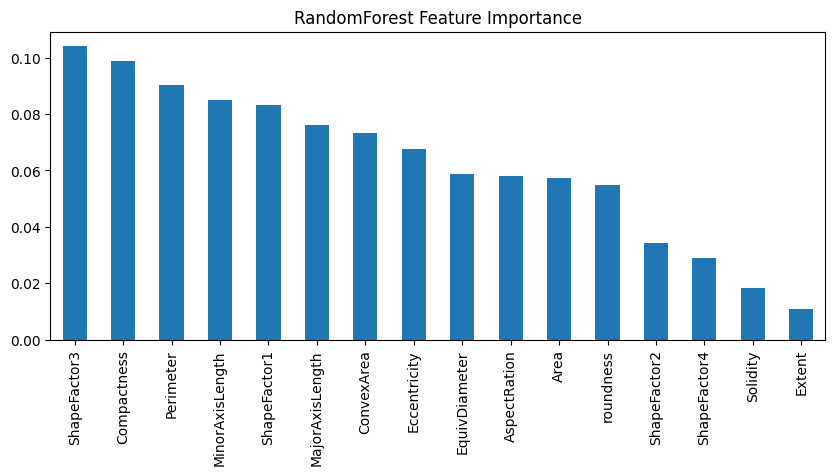

In [ ]:
# RandomForest feature importance
imp = pd.Series(best_model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(imp.to_frame("RF_feature_importance"))
imp.plot(kind="bar", figsize=(10,4), title="RandomForest Feature Importance"); plt.show()

# Classification report and confusion matrix for Train, Val and Test of best models from each classifier


=== Best LogisticRegression===

TRAIN report
              precision    recall  f1-score   support

           0      0.948     0.913     0.930       793
           1      1.000     1.000     1.000       313
           2      0.933     0.943     0.938       978
           3      0.924     0.923     0.924      2127
           4      0.953     0.953     0.953      1157
           5      0.955     0.952     0.953      1216
           6      0.862     0.876     0.869      1582

    accuracy                          0.927      8166
   macro avg      0.939     0.937     0.938      8166
weighted avg      0.927     0.927     0.927      8166



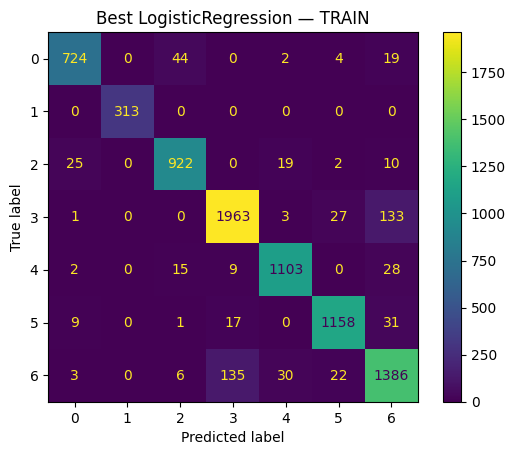


VAL report
              precision    recall  f1-score   support

           0      0.938     0.913     0.925       265
           1      1.000     1.000     1.000       105
           2      0.936     0.945     0.940       326
           3      0.919     0.917     0.918       709
           4      0.966     0.945     0.955       385
           5      0.941     0.948     0.945       405
           6      0.866     0.884     0.875       527

    accuracy                          0.925      2722
   macro avg      0.938     0.936     0.937      2722
weighted avg      0.926     0.925     0.926      2722



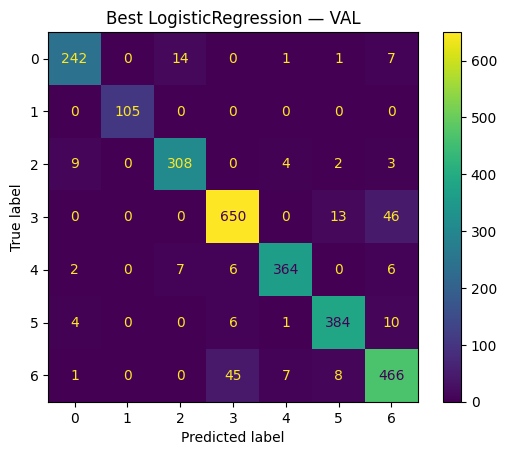


TEST report
              precision    recall  f1-score   support

           0      0.964     0.902     0.932       264
           1      1.000     1.000     1.000       104
           2      0.937     0.954     0.945       326
           3      0.930     0.900     0.915       710
           4      0.952     0.972     0.962       386
           5      0.928     0.958     0.943       406
           6      0.841     0.861     0.851       527

    accuracy                          0.922      2723
   macro avg      0.936     0.935     0.935      2723
weighted avg      0.922     0.922     0.922      2723



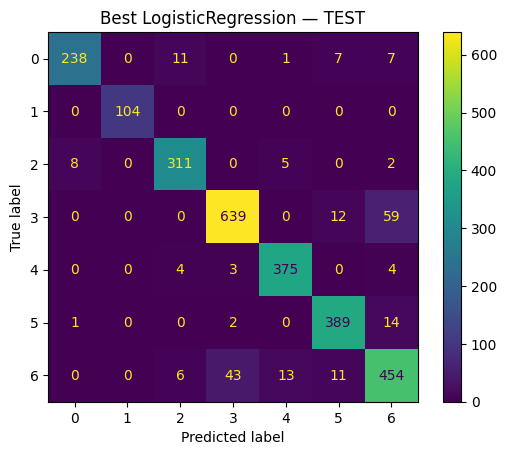


=== Best SVM===

TRAIN report
              precision    recall  f1-score   support

           0      0.965     0.946     0.955       793
           1      1.000     1.000     1.000       313
           2      0.946     0.958     0.952       978
           3      0.918     0.945     0.931      2127
           4      0.973     0.952     0.963      1157
           5      0.968     0.959     0.964      1216
           6      0.896     0.884     0.890      1582

    accuracy                          0.940      8166
   macro avg      0.953     0.949     0.951      8166
weighted avg      0.940     0.940     0.940      8166



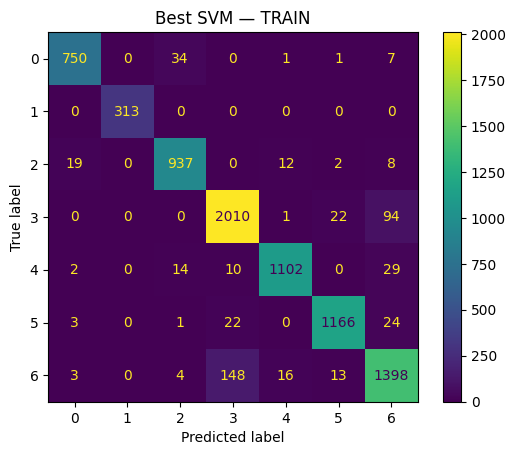


VAL report
              precision    recall  f1-score   support

           0      0.960     0.917     0.938       265
           1      0.991     1.000     0.995       105
           2      0.937     0.963     0.950       326
           3      0.910     0.932     0.921       709
           4      0.974     0.956     0.965       385
           5      0.948     0.953     0.951       405
           6      0.901     0.884     0.893       527

    accuracy                          0.934      2722
   macro avg      0.946     0.944     0.945      2722
weighted avg      0.934     0.934     0.934      2722



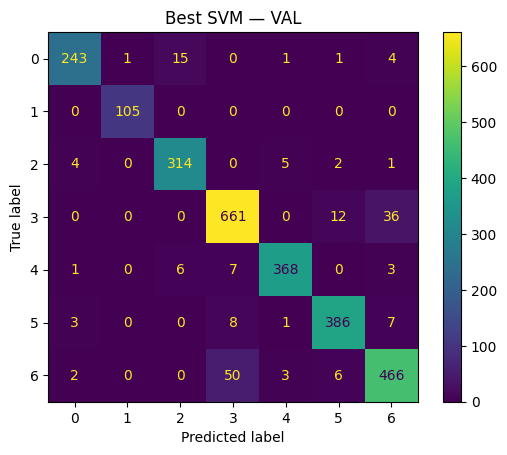


TEST report
              precision    recall  f1-score   support

           0      0.949     0.909     0.928       264
           1      1.000     1.000     1.000       104
           2      0.951     0.954     0.953       326
           3      0.921     0.921     0.921       710
           4      0.954     0.961     0.957       386
           5      0.932     0.948     0.940       406
           6      0.863     0.863     0.863       527

    accuracy                          0.925      2723
   macro avg      0.939     0.937     0.938      2723
weighted avg      0.925     0.925     0.925      2723



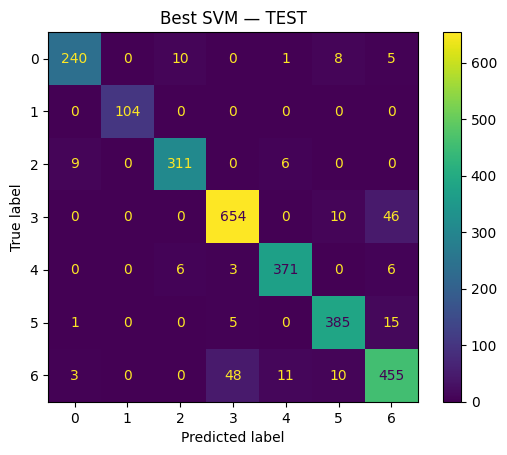


=== Best RandomForest===

TRAIN report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       793
           1      1.000     1.000     1.000       313
           2      1.000     1.000     1.000       978
           3      1.000     1.000     1.000      2127
           4      1.000     1.000     1.000      1157
           5      1.000     1.000     1.000      1216
           6      1.000     1.000     1.000      1582

    accuracy                          1.000      8166
   macro avg      1.000     1.000     1.000      8166
weighted avg      1.000     1.000     1.000      8166



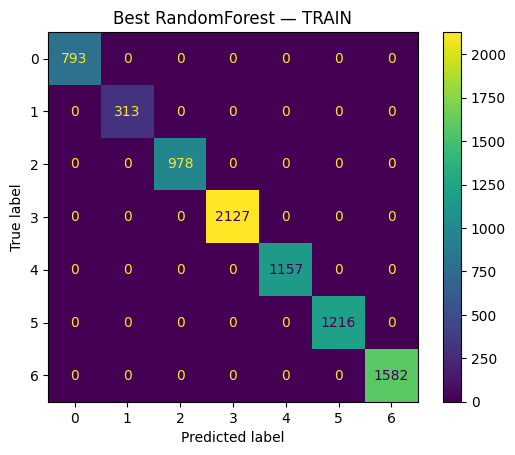


VAL report
              precision    recall  f1-score   support

           0      0.942     0.913     0.927       265
           1      0.991     1.000     0.995       105
           2      0.941     0.936     0.938       326
           3      0.910     0.932     0.921       709
           4      0.961     0.948     0.954       385
           5      0.944     0.951     0.947       405
           6      0.891     0.880     0.885       527

    accuracy                          0.928      2722
   macro avg      0.940     0.937     0.938      2722
weighted avg      0.928     0.928     0.928      2722



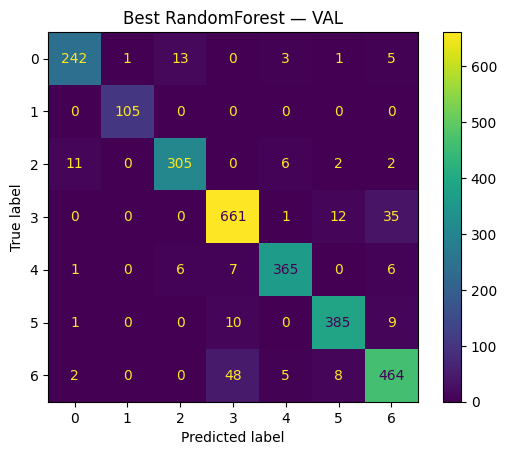


TEST report
              precision    recall  f1-score   support

           0      0.940     0.898     0.919       264
           1      1.000     1.000     1.000       104
           2      0.936     0.942     0.939       326
           3      0.903     0.917     0.910       710
           4      0.947     0.966     0.956       386
           5      0.932     0.943     0.938       406
           6      0.858     0.835     0.846       527

    accuracy                          0.916      2723
   macro avg      0.931     0.929     0.930      2723
weighted avg      0.916     0.916     0.916      2723



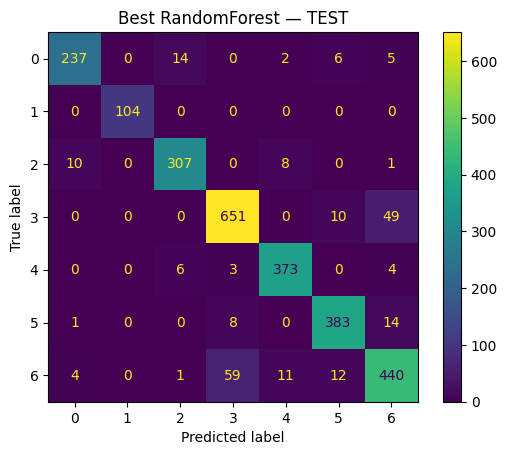

In [ ]:
# Evaluate best models on train/val/test
def eval_and_show(model, name):
    print(f"\n=== {name}===")
    for split_name, (X_, y_) in {
        "TRAIN": (X_train_scaled,y_train_enc),
        "VAL"  : (X_val_scaled,y_val_enc),
        "TEST" : (X_test_scaled,y_test_enc)
    }.items():
        yp = model.predict(X_)
        print(f"\n{split_name} report")
        print(classification_report(y_, yp, digits=3))
        show_confusion(y_, yp, f"{name} — {split_name}")

eval_and_show(best_model_lr,  "Best LogisticRegression")
eval_and_show(best_model_svm, "Best SVM")
eval_and_show(best_model_rf,  "Best RandomForest")


1. I've done an ensemble of the 3 observed best classifiers and displayed the results below
2. Both individual and ensemble gave closely similar macro and weighted average of F-1 classes on test, which affirms that the ensemle is the best and reasonable representation of the individual models for the given dataset's label prediction
   RF avg F-1: 93%, 92%
   SVM avg F-1: 94%, 92%
   Softmax avg F-1: 94%, 92%
   Ensemble avg F-1: 94%,92%

# Ensemble

Ensemble on validation:
              precision    recall  f1-score   support

           0      0.956     0.909     0.932       265
           1      0.991     1.000     0.995       105
           2      0.934     0.951     0.942       326
           3      0.910     0.929     0.920       709
           4      0.968     0.953     0.961       385
           5      0.946     0.953     0.950       405
           6      0.891     0.880     0.885       527

    accuracy                          0.930      2722
   macro avg      0.942     0.940     0.941      2722
weighted avg      0.930     0.930     0.930      2722



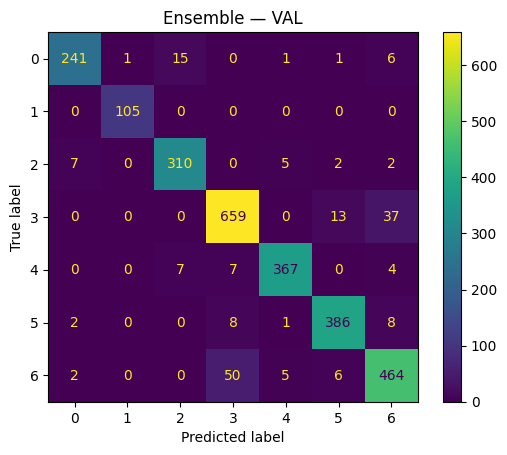

Ensemble on test (after refit on train+val):
              precision    recall  f1-score   support

           0      0.956     0.909     0.932       264
           1      1.000     1.000     1.000       104
           2      0.951     0.957     0.954       326
           3      0.916     0.911     0.914       710
           4      0.949     0.966     0.958       386
           5      0.932     0.946     0.939       406
           6      0.854     0.858     0.856       527

    accuracy                          0.923      2723
   macro avg      0.937     0.935     0.936      2723
weighted avg      0.923     0.923     0.922      2723



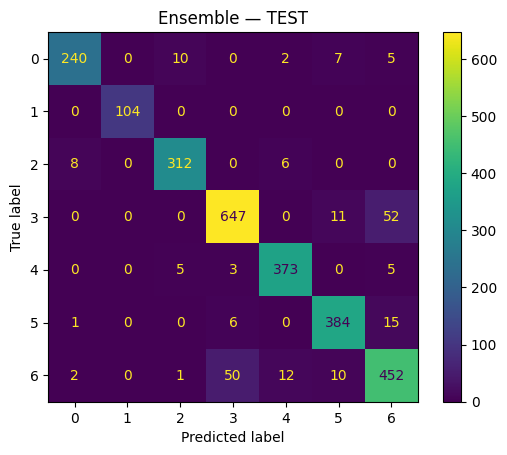

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', best_model_lr),
        ('svm', best_model_svm),
        ('rf', best_model_rf)
    ],
    voting='soft',
    n_jobs=-1
)

# Fit ensemble on the same training data
voting_clf.fit(X_train_scaled, y_train_enc)

print("Ensemble on validation:")
y_val_pred = voting_clf.predict(X_val_scaled)
print(classification_report(y_val_enc, y_val_pred, digits=3))
show_confusion(y_val_enc, y_val_pred, "Ensemble — VAL")

# If ensemble wins on VAL, retrain on TRAIN+VAL, then test:
X_trval = pd.concat([pd.DataFrame(X_train_scaled),pd.DataFrame(X_val_scaled)], axis=0).values  # convert back to numpy if needed
y_trval = pd.concat([pd.Series(y_train_enc),pd.Series(y_val_enc)], axis=0).values
voting_clf.fit(X_trval, y_trval)

print("Ensemble on test (after refit on train+val):")
y_test_pred = voting_clf.predict(X_test_scaled)
print(classification_report(y_test_enc, y_test_pred, digits=3))
show_confusion(y_test_enc, y_test_pred, "Ensemble — TEST")